In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = './data/'

In [272]:
def load_entso_e_data(directory):
    data = pd.read_csv(os.path.join(directory, "2014_12_ActualTotalLoad.csv"), sep = '\t', encoding = 'utf-16')
    #2021
    for year in range(2015, 2021):
        for month in range(1, 13):
            print(f'Loading currently year {year} and month {month}')
            
            file = os.path.join(directory, f'{year}_{month}_ActualTotalLoad.csv')
            if(os.path.exists(file)):
                current_month = pd.read_csv(file, sep = '\t', encoding = 'utf-16')
                data = data.append(current_month)

    data["DateTime"] = pd.to_datetime(data["DateTime"]) 
    
    data = data.sort_values(by = ["AreaName", "DateTime"])
    
    return data

power_demand = load_entso_e_data(DOWNLOAD_DIR)

Loading currently year 2015 and month 1
Loading currently year 2015 and month 2
Loading currently year 2015 and month 3
Loading currently year 2015 and month 4
Loading currently year 2015 and month 5
Loading currently year 2015 and month 6
Loading currently year 2015 and month 7
Loading currently year 2015 and month 8
Loading currently year 2015 and month 9
Loading currently year 2015 and month 10
Loading currently year 2015 and month 11
Loading currently year 2015 and month 12
Loading currently year 2016 and month 1
Loading currently year 2016 and month 2
Loading currently year 2016 and month 3
Loading currently year 2016 and month 4
Loading currently year 2016 and month 5
Loading currently year 2016 and month 6
Loading currently year 2016 and month 7
Loading currently year 2016 and month 8
Loading currently year 2016 and month 9
Loading currently year 2016 and month 10
Loading currently year 2016 and month 11
Loading currently year 2016 and month 12
Loading currently year 2017 and mo

Which countries and regions are there?

In [303]:
power_demand["AreaName"].unique()

array(['50Hertz CA', 'APG BZ', 'APG CA', 'AST BZ', 'AST CA', 'Albania',
       'Amprion CA', 'Austria', 'Belgium', 'Bosnia Herzegovina',
       'Bulgaria', 'CEPS BZ', 'CEPS CA', 'CGES BZ', 'CGES CA', 'CREOS CA',
       'Croatia', 'Cyprus', 'Cyprus TSO BZ', 'Cyprus TSO CA',
       'Czech Republic', 'DE-AT-LU BZ', 'DE-LU BZ', 'DK1  BZ', 'DK2 BZ',
       'Denmark', 'ELES BZ', 'ELES CA', 'EMS BZ', 'EMS CA', 'ESO BZ',
       'ESO CA', 'EirGrid CA', 'Elering BZ', 'Elering CA', 'Elia BZ',
       'Elia CA', 'Energinet CA', 'Estonia', 'Fingrid BZ', 'Fingrid CA',
       'Finland', 'France', 'Germany', 'Greece', 'HOPS BZ', 'HOPS CA',
       'Hungary', 'IPTO BZ', 'IPTO CA', 'IT-Centre-North BZ',
       'IT-Centre-South BZ', 'IT-North BZ', 'IT-Sardinia BZ',
       'IT-Sicily BZ', 'IT-South BZ', 'Ireland', 'Ireland - (SEM) BZ',
       'Italy', 'Italy CA', 'Latvia', 'Litgrid BZ', 'Litgrid CA',
       'Lithuania', 'Luxembourg', 'MAVIR BZ', 'MAVIR CA', 'MD BZ',
       'MD CA', 'MEPSO BZ', 'MEPSO CA', '

puh... a lot! Is Austria there?

In [385]:
sum(power_demand["AreaName"].unique()=="Austria")

1

Let's get Austrian data then and...

In [386]:
def get_country_data(data, country):
    return data[data["AreaName"] == country]

power_demand_at = get_country_data(power_demand, "Austria")

... plot it.

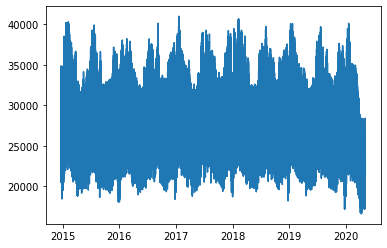

In [387]:
def plot_data(data):
    plt.plot(data["DateTime"], data["TotalLoadValue"])
    
plot_data(power_demand_at)

Hm... there may be outliers. But how complete is Austrian data?

In [388]:
def check_data_completeness(data):
    nmb_nas = np.sum(pd.isna(data["TotalLoadValue"]))
    nmb_0 = np.sum(data["TotalLoadValue"] == 0) 
    
    print(f'The data contains {nmb_nas} NAs and {nmb_0} zeros')
    
check_data_completeness(power_demand_at)

The data contains 0 NAs and 0 zeros


How complete is e.g. North Macedonian data in comparison?

In [389]:
power_demand_nm = get_country_data(power_demand, "North Macedonia")
check_data_completeness(power_demand_nm)

The data contains 0 NAs and 648 zeros


In [390]:
power_demand_at.shape

(47136, 11)

How many hours should we expect? (approximately 5.5 years)

In [391]:
5.5*365*24

48180.0

Wowh! That's a lot of entries... why? Let's look at the first timesteps...

In [392]:
power_demand_at.iloc[1:24, :]

,Year,Month,Day,DateTime,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
36291,2014,12,19,2014-12-19 10:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,33975.0,2017-09-14 04:00:07
36379,2014,12,19,2014-12-19 11:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,33454.0,2017-09-14 04:00:07
36700,2014,12,19,2014-12-19 12:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,32967.0,2017-09-14 04:00:07
36307,2014,12,19,2014-12-19 13:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,31753.0,2017-09-14 04:00:07
36292,2014,12,19,2014-12-19 14:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,31079.0,2017-09-14 04:00:07
36380,2014,12,19,2014-12-19 15:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,30962.0,2017-09-14 04:00:07
36701,2014,12,19,2014-12-19 16:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,31943.0,2017-09-14 04:00:07
36308,2014,12,19,2014-12-19 17:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,34406.0,2017-09-14 04:00:07
36293,2014,12,19,2014-12-19 18:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,34878.0,2017-09-14 04:00:07
36381,2014,12,19,2014-12-19 19:00:00,PT60M,10YES-REE------0,CTY,Spain,ES,34670.0,2017-09-14 04:00:07


Oh. This is quater-hourly data! We are going to work mainly with hourly data, so let's aggregate the 15 minutes data to hourly data.

In [393]:
def aggregate_data_hourly(data):
    
    times = pd.DatetimeIndex(data["DateTime"])
    data_hourly = data.groupby([times.year, times.month, times.day, times.hour])
    data_hourly_agg = data_hourly.agg({"DateTime":"min",
                     "TotalLoadValue":"mean"}
                    )
    
    return data_hourly_agg

power_demand_at_hourly = aggregate_data_hourly(power_demand_at)

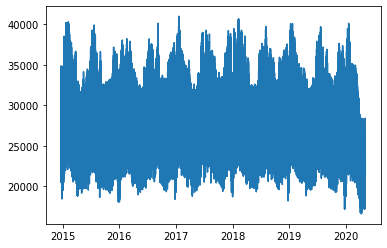

In [394]:
plot_data(power_demand_at_hourly)

Let's look into the data more closely and find some regularities...

In [395]:
def aggregate_data_yearly(data):
    
    times = pd.DatetimeIndex(data["DateTime"])
    data_yearly = data.groupby([times.year])
    data_yearly_agg = data_yearly.agg(
                    {"DateTime":"min",
                     "TotalLoadValue":"sum"}
                    )
    
    return data_yearly_agg

power_demand_at_yearly = aggregate_data_yearly(power_demand_at_hourly)

The data is in MWh, let's convert it to TWh.

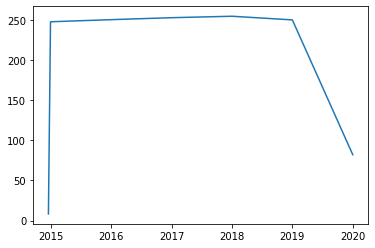

In [396]:
# let's convert the data to twh
power_demand_at_yearly_twh = power_demand_at_yearly 
power_demand_at_yearly_twh["TotalLoadValue"] = power_demand_at_yearly["TotalLoadValue"] / 10**6 


plot_data(power_demand_at_yearly_twh)

Hm... 2014 and 2020 are really low. We should filter the years as they are incomplete...

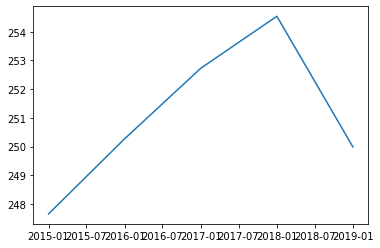

In [397]:
def filter_data(data, start_year, start_month, start_day, end_year, end_month, end_day):
    lim_low = datetime.datetime(start_year, start_month, start_day)
    lim_up = datetime.datetime(end_year, end_month, end_day)
    
    data = data[(data["DateTime"] >= lim_low) & (data["DateTime"] <= lim_up)]
    
    return data

power_demand_at_yearly_full_years = filter_data(power_demand_at_yearly_twh, 2015, 1, 1, 2019, 12, 31)
plot_data(power_demand_at_yearly_full_years)

Hm... hard to tell if there is a trend. Time-series too short. Let's neglect it for the moment.

In [398]:
def aggregate_data_monthly(data):
    
    times = pd.DatetimeIndex(data["DateTime"])
    data_monthly = data.groupby([times.year, times.month])
    data_monthly_agg = data_monthly.agg({"DateTime":"min",
                     "TotalLoadValue":"sum"}
                    )
    
    return data_monthly_agg

power_demand_at_monthly = aggregate_data_monthly(power_demand_at)

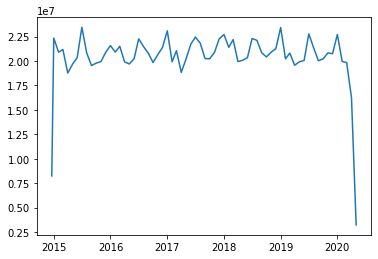

In [399]:
plot_data(power_demand_at_monthly)

hm... seems to be seasonal, right? But let's also filter it to the full years only.

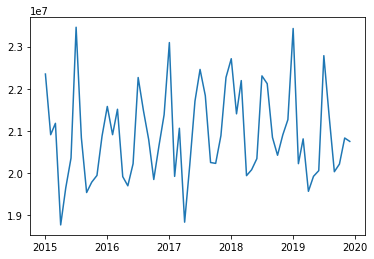

In [400]:
power_demand_at_monthly_full_years = filter_data(power_demand_at_monthly, 2015, 1, 1, 2019, 12, 31)
plot_data(power_demand_at_monthly_full_years)

To understand it better, we could simply take the monthly average...

In [401]:
def aggregate_data_monthly_mean(data):
        
    times = pd.DatetimeIndex(data["DateTime"])
    data_monthly = data.groupby([times.month])
    data_monthly_agg = data_monthly.agg({"DateTime":"min",
                     "TotalLoadValue":"mean"}
                    )
    
    data_monthly_agg["DateTime"] = data_monthly_agg.index
    
    return data_monthly_agg

power_demand_at_monthly_mean = aggregate_data_monthly_mean(power_demand_at_monthly_full_years)

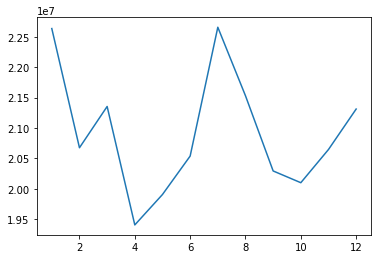

In [402]:
plot_data(power_demand_at_monthly_mean)

Hm... power demand seems to be seasonal.

Let's now zoom in a little bit into the data to see if there are other regularities.

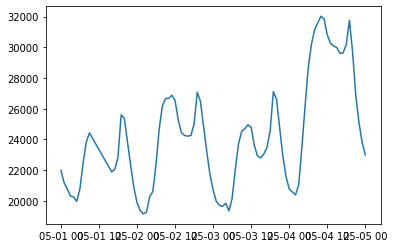

In [403]:
power_demand_at_hourly_zoom = filter_data(power_demand_at_hourly, 2015, 5, 1, 2015, 5, 5)
plot_data(power_demand_at_hourly_zoom)

There also seems to be a certain regularity here. Daily?

Let's look at hourly mean values.

In [404]:
def aggregate_data_hourly_mean(data):
        
    times = pd.DatetimeIndex(data["DateTime"])
    data_hourly = data.groupby([times.hour])
    data_hourly_agg = data_hourly.agg({"DateTime":"min",
                     "TotalLoadValue":"mean"}
                    )
    
    data_hourly_agg["DateTime"] = data_hourly_agg.index
    
    return data_hourly_agg

power_demand_at_hourly_mean = aggregate_data_hourly_mean(power_demand_at_hourly)

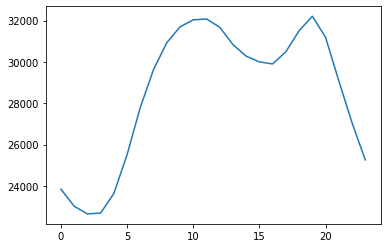

In [405]:
plot_data(power_demand_at_hourly_mean)

Also seems to be pretty regular...

Anything else that could be pretty regular?

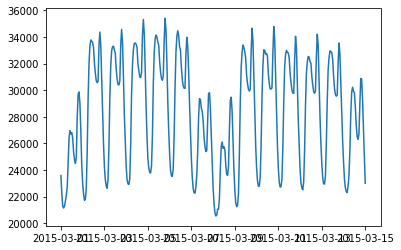

In [406]:
power_demand_at_hourly_zoom = filter_data(power_demand_at_hourly, 2015, 3, 1, 2015, 3, 15)
plot_data(power_demand_at_hourly_zoom)

Seems to be a weekly pattern... can we look into this?

In [407]:
def aggregate_data_weekday_mean(data):
        
    data_weekday = data.groupby([data.DateTime.dt.weekday])
    data_weekday_agg = data_weekday.agg({"DateTime":"min",
                     "TotalLoadValue":"mean"}
                    )
    
    data_weekday_agg["DateTime"] = data_weekday_agg.index
    
    return data_weekday_agg

power_demand_at_weekday_mean = aggregate_data_weekday_mean(power_demand_at_hourly)

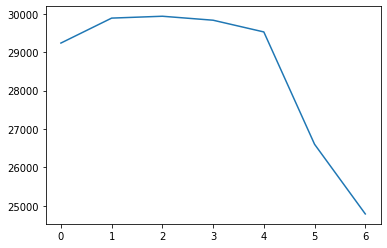

In [408]:
plot_data(power_demand_at_weekday_mean)

Well... seems to be also pretty regular. Let's use all of this to predict demand! For the moment, we just use linear regression.

Our predicted value Y is the hourly demand.

In [409]:
# Our predicted variable Y is the hourly load

power_demand_at_hourly_reduced =  filter_data(power_demand_at_hourly, 2015, 1, 1, 2019, 12, 31)

Y = np.array(power_demand_at_hourly_reduced["TotalLoadValue"]).reshape(-1, 1)

In [410]:
Y

array([[24382.],
       [22734.],
       [21286.],
       ...,
       [26713.],
       [24230.],
       [22065.]])

Our predictor variables (or features) are simply months, weekdays, and hours. These work as dummy variables. Who knows what a dummy is?

What is important, when using dummies?

In [411]:
monthly_dummies = np.array(pd.get_dummies(power_demand_at_hourly_reduced.DateTime.dt.month))[:, :11]
weekday = np.array(pd.get_dummies(power_demand_at_hourly_reduced.DateTime.dt.weekday))[:, :6]
hour = np.array(pd.get_dummies(power_demand_at_hourly_reduced.DateTime.dt.hour))[:, :23]

In [412]:
monthly_dummies

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Joining them all together.

In [413]:
X = np.append(monthly_dummies, weekday, axis = 1)
X = np.append(X, hour, axis = 1)

In [414]:
X.shape

(43765, 40)

Let's put this into a linear model.

In [415]:
#regr = linear_model.LinearRegression(fit_intercept = False)
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# The coefficients
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [[ 1804.98660187  1865.67491663   -27.49948569 -1693.98852261
  -1932.65562149  -195.54974685  1762.93464106   177.3484738
   -483.55815847 -1701.01688751   -31.58464488  4502.98313023
   5171.86110796  5257.33649129  5128.75128217  4798.46167568
   1832.9871531  -1400.9318952  -2209.97987239 -2577.79232877
  -2525.87512383 -1552.13643836   351.00316565  2639.28963355
   4470.5088652   5750.78263717  6494.45734963  6838.80685746
   6881.2798405   6459.09106258  5635.78925584  5113.73714394
   4860.75908579  4756.46997139  5330.45380352  6299.53553692
   6952.5578631   5913.06280585  3804.83174295  1791.81917808]]


What does the intercept of the regression tell us?

In [416]:
regr.intercept_

array([21566.7795337])

Let's predict with the model on the training data...

In [417]:
pred = regr.predict(X)

How does it look like?

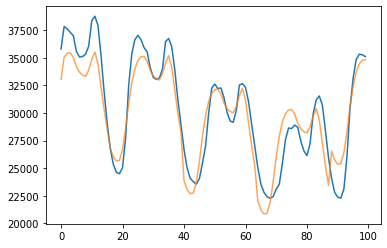

In [418]:
plt.plot(Y[1000:1100, :])
plt.plot(pred[1000:1100, :], alpha = 0.7)

Pretty cool for such a simple model. How does it look over the whole range?

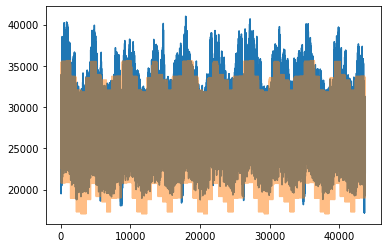

In [419]:
plt.plot(Y)
plt.plot(pred, alpha = 0.5)

And R^2?

In [420]:
r2_score(Y, pred)

0.7860927465729495

Wowh. This is pretty high for such a simple model. It means we have rather regular data.

What about means? What would you expect?

In [427]:
print(f'Mean of observations: {np.mean(Y)}. Modelled mean: {np.mean(pred)}')

Mean of observations: 28666.427487718498. Modelled mean: 28666.427487718498


What do coefficients tell us? What would you expect?

First months...

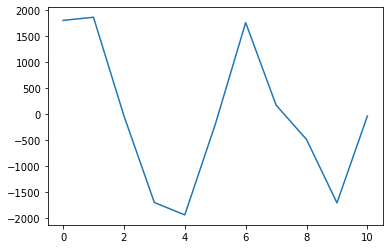

In [421]:
coefs = np.array(regr.coef_).T

plt.plot(coefs[:11, :])

Then weekdays...

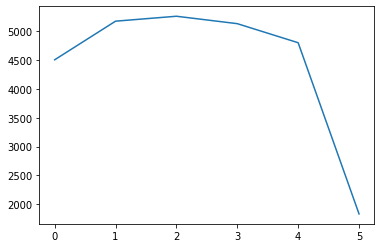

In [422]:
plt.plot(coefs[11:17, :])

Then hours of day...

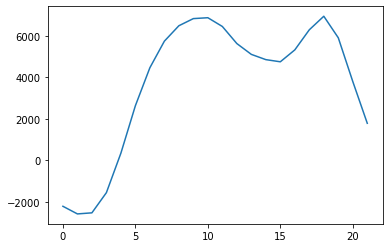

In [423]:
plt.plot(coefs[18:, :])

How do residuals look like now? What is left over and we cannot explain it?

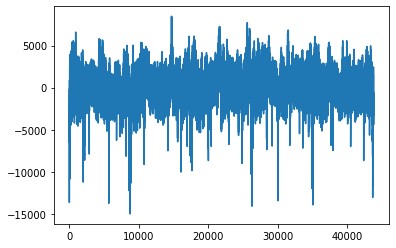

In [424]:
residual = (Y - pred)

plt.plot(residual)